# StandardScaler, MinMaxScaler and RobustScaler techniques - ML


*   In machine learning value of features may have different ranges and units. This variation can impact negatively on the performance of algorithms like KNN, SVM or Logistic Regression.
*    To avoid this issue feature scaling is used to standardize data. In this article, we’ll see three commonly used scaling techniques.

# 1. StandardScaler


*   StandardScaler is a feature scaling technique which follows Standard Normal Distribution (SND) and is used to standardize the values of numeric features.
*   It transforms data so that the mean becomes 0 and the standard deviation becomes 1.

*   It’s ideal for algorithms like SVM, logistic regression or neural networks that assume data is normally distributed.

---
 It subtracts mean of the data and divides by the standard deviation. This **centers the data around zero** and standardizes variability.


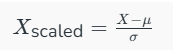


*   Where:

**X** is the original *value*, **μ** the *mean* of the feature,
**σ** the *standard deviation*.
### Advantages


*   It handles features with different units effectively.
*   It reduces impact of outliers without completely removing them.


### Disadvantages
*   It is sensitive to outliers and extreme values can skew mean and standard deviation which leads to poor scaling.

*   It is not ideal for non-normal distributions.



# 2. MinMaxScaler


*   MinMaxScaler scales all data features in range **[0, 1]** or else in range **[-1, 1]** if there are negative values are present in the dataset. Use it when our data does not follow a normal distribution or when we need scaled data for algorithms like decision trees, k-nearest neighbors or support vector machines.
*    It gives best results when **outliers are minimal** or absent as it is sensitive to extreme values.


*   It scales data to a fixed range (typically [0, 1]) by subtracting minimum value and dividing by the range (max - min) which ensures all feature values lies within specified range.

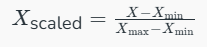

Where:
**X** is the original value, **x(min)** is the minimum value of the feature **X(max)** is the maximum value of the feature
### Advantages

* It ensures that all features have same scale.
* It is simple and easy to interpret.
### Disadvantages
* It is sensitive to outliers and the extreme values can distort scaling which makes most data points cluster near 0 or 1.

* Fixed range limits flexibility for datasets with changing scales.

## 3. RobustScaler
* RobustScaler reduces the impact of outliers by scaling data using median and interquartile range (IQR) which makes it fit to extreme values.
* We use it when our data contains many outliers and we need to maintain relative distances between non-outlier data points or we’re working with algorithms which are sensitive to extreme values.

* It subtracts median of data and divides by interquartile range (IQR) which helps in reducing the effect of outliers while maintaining distribution of non-outlier values.
* The median and IQR are stored during fitting so they can be applied to future data using the transform method.
* 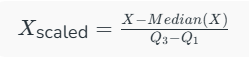

* where:
* **X** is the original value, **Median(X)** is the Q2 or the median quartile *(50th percentile)*
* **Q1** is the first quartile*(25th percentile)* **Q3** is the third quartile *(75th percentile)*

### Advantages

* It is resistant to outliers.
* It maintains the structure of data and it is better than MinMaxScaler in the presence of extreme values.
###Disadvantages

* This may not perform well when data is highly skewed.
* It is less interpretable compared to MinMaxScaler.

# Implementing Comparison between StandardScaler, MinMaxScaler and RobustScaler.
We will be using **Pandas**, **Numpy**, **Matplotlib**, and **Seaborn** libraries for this implementation.

* **np.random.normal:** This is used to generate random values from a normal distribution, it is responsible for generating the data in **x1** and **x2**.
* **scaler = preprocessing.RobustScaler():** This creates an example of  RobustScaler to scale data by using median and interquartile range.
* **scaler = preprocessing.StandardScaler():** This creates an example of StandardScaler to scale data by removing mean and scaling to unit variance.
* **scaler = preprocessing.MinMaxScaler():** This creates an example of MinMaxScaler to scale data to a specified range **[0, 1]**.



In [2]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
matplotlib.style.use('fivethirtyeight')
x = pd.DataFrame({
    'x1': np.concatenate([np.random.normal(20, 2, 1000), np.random.normal(1, 2, 25)]),
    'x2': np.concatenate([np.random.normal(30, 2, 1000), np.random.normal(50, 2, 25)]),
})


<Axes: title={'center': 'After Min-Max Scaling'}, xlabel='x1', ylabel='Density'>

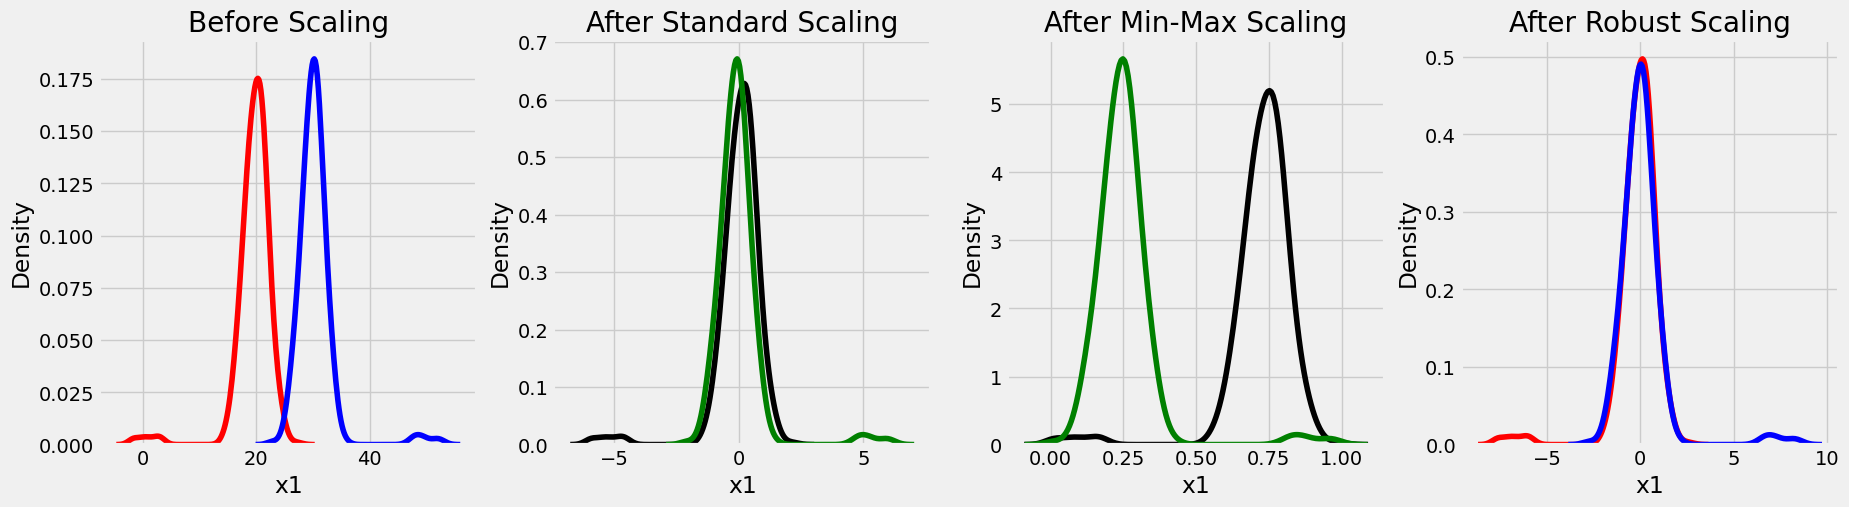

In [3]:
scaler = preprocessing.RobustScaler()
robust_df = scaler.fit_transform(x)
robust_df = pd.DataFrame(robust_df, columns=['x1', 'x2'])


scaler = preprocessing.StandardScaler()
standard_df = scaler.fit_transform(x)
standard_df = pd.DataFrame(standard_df, columns=['x1', 'x2'])


scaler = preprocessing.MinMaxScaler()
minmax_df = scaler.fit_transform(x)
minmax_df = pd.DataFrame(minmax_df, columns=['x1', 'x2'])


fig, (ax1, ax2, ax3, ax4) = plt.subplots(ncols=4, figsize=(20, 5))
ax1.set_title('Before Scaling')
sns.kdeplot(x['x1'], ax=ax1, color='r')
sns.kdeplot(x['x2'], ax=ax1, color='b')
ax4.set_title('After Robust Scaling')
sns.kdeplot(robust_df['x1'], ax=ax4, color='red')
sns.kdeplot(robust_df['x2'], ax=ax4, color='blue')
ax2.set_title('After Standard Scaling')
sns.kdeplot(standard_df['x1'], ax=ax2, color='black')
sns.kdeplot(standard_df['x2'], ax=ax2, color='g')
ax3.set_title('After Min-Max Scaling')
sns.kdeplot(minmax_df['x1'], ax=ax3, color='black')
sns.kdeplot(minmax_df['x2'], ax=ax3, color='g')

* **StandardScaler** adjusts data to have a *mean of 0* and *standard deviation of 1* but it is sensitive to outliers.
* **MinMaxScaler** scales data to a fixed range **([0, 1])** but extreme values can effect results. Each scaler works best in specific situations.
* **RobustScaler** uses *median* and *IQR* to handle outliers while maintaing data's shape.